In [3]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [5]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [6]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 [==============================] - 5s 8ms/step - loss: 0.5708 - accuracy: 0.0017 - val_loss: 0.4656 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.0042 - val_loss: 0.3967 - val_accuracy: 0.0080
Epoch 3/5
47/47 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.0067 - val_loss: 0.3706 - val_accuracy: 0.0030
Epoch 4/5
47/47 [==============================] - 0s 4ms/step - loss: 0.3576 - accuracy: 0.0083 - val_loss: 0.3531 - val_accuracy: 0.0140
Epoch 5/5
47/47 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.0122 - val_loss: 0.3417 - val_accuracy: 0.0100


In [9]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 0s 2ms/step


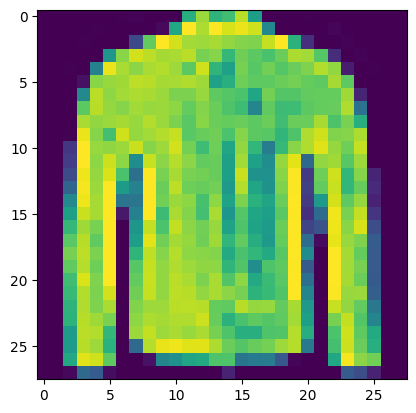

In [10]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

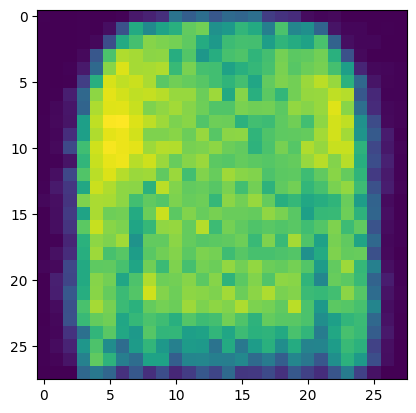

In [11]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

#1. Add one more hidden layer to autoencoder

In [12]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 8s 10ms/step - loss: 0.3227 - accuracy: 0.0126 - val_loss: 0.2939 - val_accuracy: 0.0151
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2856 - accuracy: 0.0216 - val_loss: 0.2852 - val_accuracy: 0.0258
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2795 - accuracy: 0.0283 - val_loss: 0.2795 - val_accuracy: 0.0283
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2761 - accuracy: 0.0311 - val_loss: 0.2770 - val_accuracy: 0.0302
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2742 - accuracy: 0.0339 - val_loss: 0.2753 - val_accuracy: 0.0333


#2. Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

In [13]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


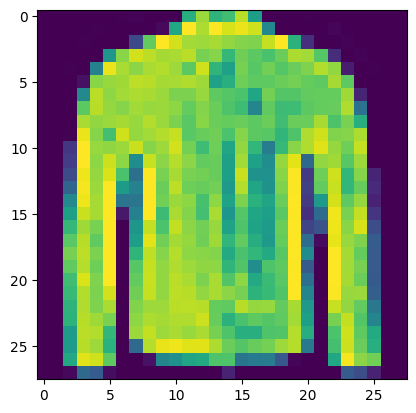

In [14]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

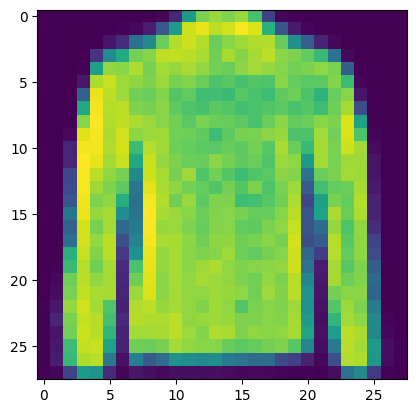

In [15]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()